# Bike Sharing System

## Dataset

Data source : https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
    
Performing analysis on this dataset which contains the hourly count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information. Dataset consists of 17379 rows and 17 features (columns).


## Data Analysis

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

(ref: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

#### Tools utilized:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

### Describing Bike Sharing Dataset
Inspecting the structure and summary information for the Bike Sharing data. 

In [2]:
bike_sharing_data = pd.read_csv('hour.csv', sep = ",", header = 0, parse_dates = [1])
print(bike_sharing_data.shape)
print('Dataset consists of {} rows and {} columns'.format(len(bike_sharing_data), len(bike_sharing_data.columns)))
print("The first 5 rows of the dataset:")
bike_sharing_data.head()

(17379, 17)
Dataset consists of 17379 rows and 17 columns
The first 5 rows of the dataset:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Features (columns) of the dataset:

- instant : record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
    - 1 : Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2 : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4 : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp : Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum : Normalized humidity. The values are divided to 100 (max)
- windspeed : Normalized wind speed. The values are divided to 67 (max)
- casual : count of casual users
- registered : count of registered users
- cnt : count of total rental bikes including both casual and registered

# Descriptive Analysis & Data Visualization

In [3]:
print("Dataset Columns:\n")
print(bike_sharing_data.columns)
print("\nDatatypes of the all the columns:\n")
print(bike_sharing_data.dtypes)

Dataset Columns:

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Datatypes of the all the columns:

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [4]:
bike_sharing_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


- The above output shows the count, mean, standard deviation, minimum value, maximum value, 25th percentile, median (50th percentile), and 75th percentile of all the numeric features in the data.

- The arithmetic mean bikes rented per hour is: 189.46

- The median bikes rented per hour is: 142

- The standard deviation for bikes rented per hour is: 181.39

- Categorical variables: Season, yr, mnth, hr, holiday, weekday, workingday, weathersit.

In [5]:
## compute the pearson correlation
print(stats.pearsonr(bike_sharing_data['temp'], bike_sharing_data['atemp']))

(0.9876721390396492, 0.0)


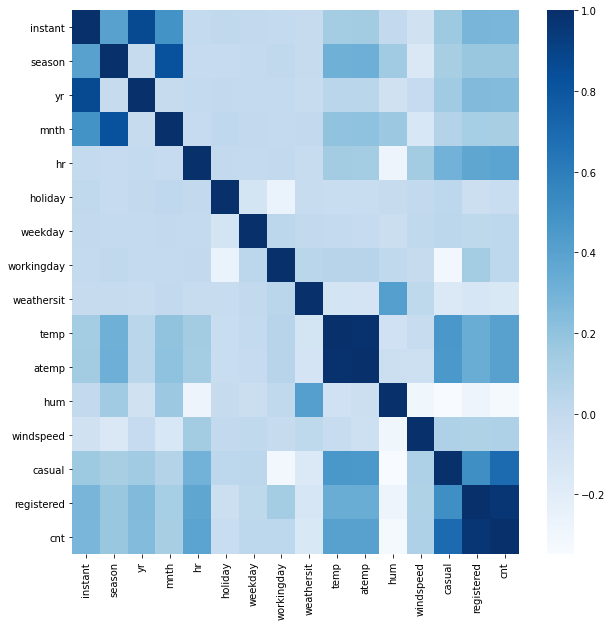

In [6]:
#Correlation between the numeric variables
correlation = bike_sharing_data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cmap="Blues")

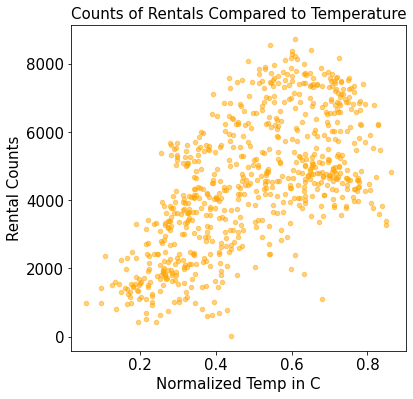

In [7]:
## set the figure dimensions
scat_fig = plt.figure(figsize = (6, 6))

daily_data = bike_sharing_data.groupby(bike_sharing_data.dteday)['temp','cnt'].agg(total_count=('cnt', 'sum'),
                                                              avg_temp = ('temp', 'mean')).reset_index()
    
## make a scatter plot
_  = plt.scatter(
    daily_data["avg_temp"],daily_data["total_count"],
    color = "orange", s = 20, alpha = 0.5, cmap='viridis'
)

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Counts of Rentals Compared to Temperature", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Rental Counts", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Normalized Temp in C", fontsize = 15)

- Variables 'temp' and 'atemp' are strongly correlated. An above average normalized temperature in celsius is associated with an above average normalized feeling temperature in Celsius. During model building any one of the feature has to be dropped since they will exhibit multicollinearity (redundancy) in the data.
- 'temp' feature has is positively correlated with 'cnt'. An above average normalized temperature in celsius is associated with an above average counts of bike rented per hour.

## Identifying Outliers
Using a boxplot, we can visually identify outliers as those points that extend beyond the whiskers 

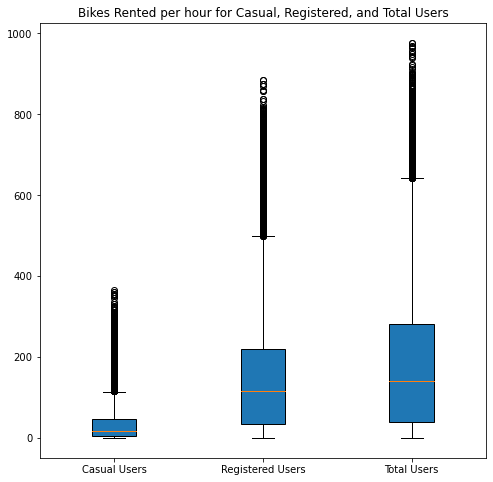

In [8]:
box_comp_hour = plt.figure(figsize = (8,8))

_ = plt.boxplot(
    [
            bike_sharing_data["casual"],
            bike_sharing_data['registered'],
            bike_sharing_data['cnt']
    ],
    labels = [
        "Casual Users",
        "Registered Users",
        "Total Users"
    ], patch_artist=True)

_ = plt.title("Bikes Rented per hour for Casual, Registered, and Total Users")

The count variables contains a lot of outlier data points which skews the distribution towards right. Lets's look at some of the outliers in the data:

In [9]:
IQR = np.percentile(bike_sharing_data["cnt"], [25, 75])
print('Q1 and Q3 are equal to: {}'.format(IQR),'\n')

IQR_size = IQR[1] - IQR[0]
print('Innerquartile range is equal to: {}\n'.format(IQR_size))

low_outliers = bike_sharing_data[bike_sharing_data["cnt"] < IQR[0] - IQR_size * 1.5]["cnt"]
high_outliers = bike_sharing_data[bike_sharing_data["cnt"] > IQR[1] + IQR_size * 1.5]["cnt"]

print(low_outliers, '\n')
print(high_outliers)

Q1 and Q3 are equal to: [ 40. 281.] 

Innerquartile range is equal to: 241.0

Series([], Name: cnt, dtype: int64) 

5536     651
10358    644
10359    712
10382    676
10383    734
        ... 
16885    724
16909    688
16933    679
17053    662
17077    678
Name: cnt, Length: 505, dtype: int64


The above values for bike rented per hour are actual possible values which can not be neglected. We cannot think of any strong evidence to get rid of outlier data. They can distort statistical analysis. We need to find a way to handle these outliers during model building.

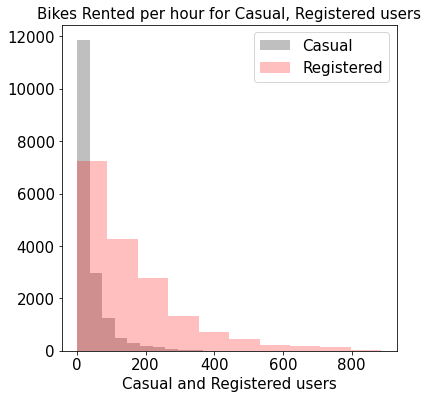

In [10]:
hist_fig = plt.figure(figsize = (6, 6))
    
_  = plt.hist(bike_sharing_data['casual'], color = "black", alpha = 0.25, label = "Casual")
_  = plt.hist(bike_sharing_data['registered'], color = "red", alpha = 0.25, label = "Registered")


plt.tick_params(labelsize = 15)

_ = plt.title("Bikes Rented per hour for Casual, Registered users", fontsize = 15)

_ = plt.xlabel("Casual and Registered users", fontsize = 15)
_ = plt.legend(fontsize = 15)

The above histogram shows density of bikes rented per hour for casual and registered users. Registered users are more likely to rent the bikes as compared to casual users. Very few casual users rent bikes.

In [11]:
bike_sharing_data['month_year'] = pd.to_datetime(bike_sharing_data['dteday']).dt.to_period('M')
bike_sharing_data['month_year'] = pd.to_datetime(bike_sharing_data['dteday']).dt.to_period('M')

month_year_counts = Counter()

for ix, row in bike_sharing_data.iterrows():
    month_year_counts[row['month_year']] += row['cnt']
    
month_year_counts

Counter({Period('2011-01', 'M'): 38189,
         Period('2011-02', 'M'): 48215,
         Period('2011-03', 'M'): 64045,
         Period('2011-04', 'M'): 94870,
         Period('2011-05', 'M'): 135821,
         Period('2011-06', 'M'): 143512,
         Period('2011-07', 'M'): 141341,
         Period('2011-08', 'M'): 136691,
         Period('2011-09', 'M'): 127418,
         Period('2011-10', 'M'): 123511,
         Period('2011-11', 'M'): 102167,
         Period('2011-12', 'M'): 87323,
         Period('2012-01', 'M'): 96744,
         Period('2012-02', 'M'): 103137,
         Period('2012-03', 'M'): 164875,
         Period('2012-04', 'M'): 174224,
         Period('2012-05', 'M'): 195865,
         Period('2012-06', 'M'): 202830,
         Period('2012-07', 'M'): 203607,
         Period('2012-08', 'M'): 214503,
         Period('2012-09', 'M'): 218573,
         Period('2012-10', 'M'): 198841,
         Period('2012-11', 'M'): 152664,
         Period('2012-12', 'M'): 123713})

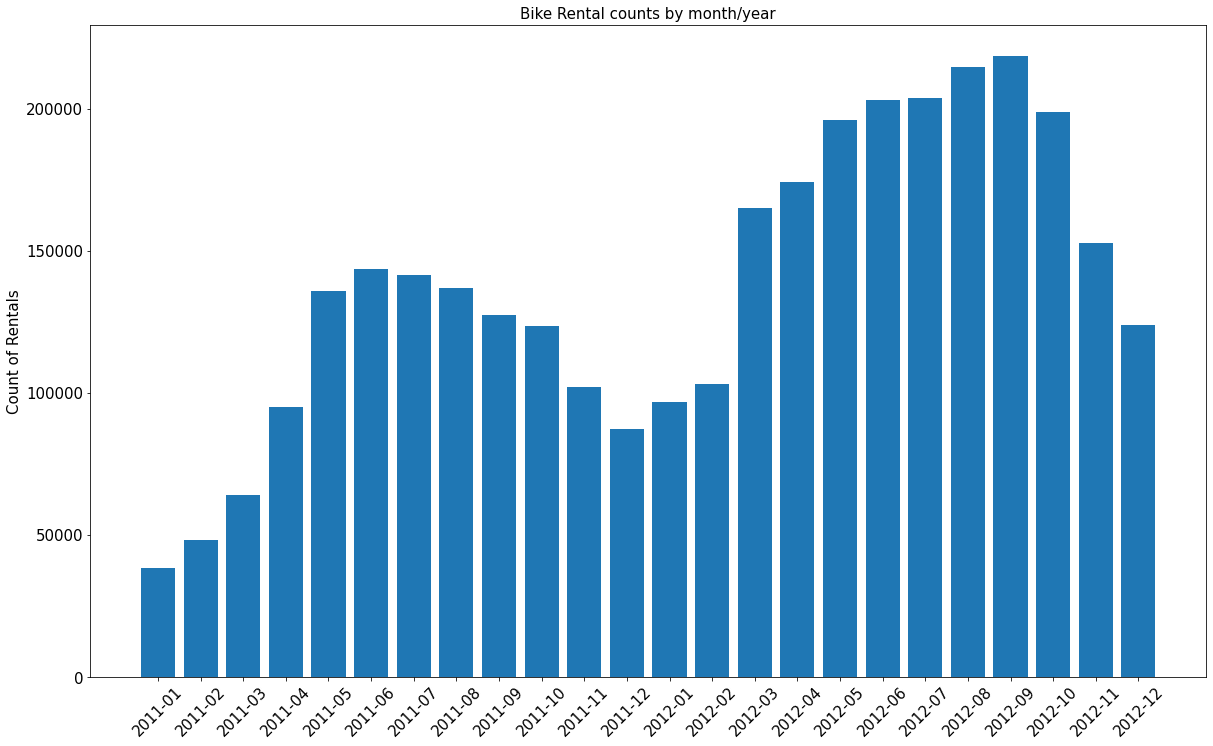

In [12]:
bar_fig = plt.figure(figsize = (20,12))

_ = plt.bar(
    x = range(1, len(month_year_counts) + 1),
    height = list(month_year_counts.values()),
    tick_label = list(month_year_counts.keys())
)

plt.tick_params(labelsize = 15)

_ = plt.title("Bike Rental counts by month/year", fontsize = 15)

_ = plt.ylabel("Count of Rentals", fontsize = 15)

_ = plt.xticks(rotation = 45)

The highest demand for bikes are in the month of May, June, July, August, and September. During Summer and start of fall season there are higher demands for bikes.

In [13]:
season_counts = Counter()

for ix, row in bike_sharing_data.iterrows():
    season_counts[row['season']] += row['cnt']
season_counts

Counter({1: 471348, 2: 918589, 3: 1061129, 4: 841613})

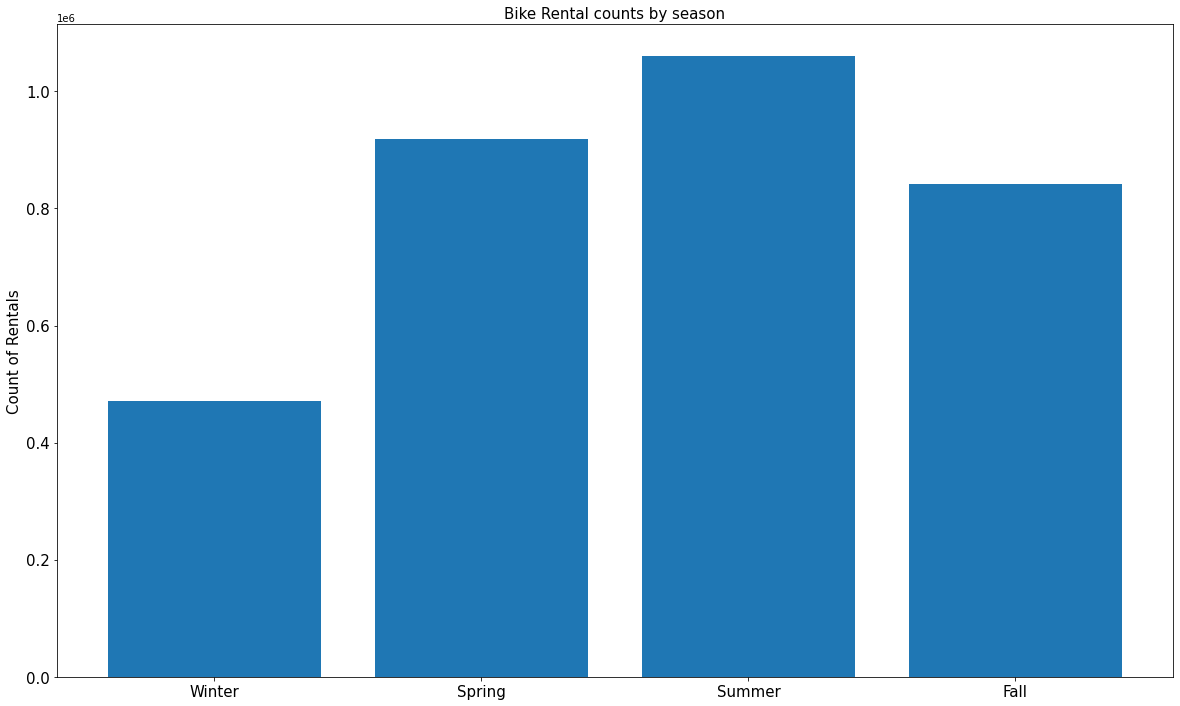

In [14]:
bar_fig = plt.figure(figsize = (20,12))
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
_ = plt.bar(
    x = range(1, len(season_counts) + 1),
    height = list(season_counts.values()),
    tick_label = list(season_counts.keys())
)

plt.tick_params(labelsize = 15)

_ = plt.title("Bike Rental counts by season", fontsize = 15)

_ = plt.ylabel("Count of Rentals", fontsize = 15)

_ = plt.xticks(range(1, len(season_counts) + 1), seasons)

From the month/year bar plot months June, July and August has got relatively higher demand for bicycle. It is quite obvious that people tend to rent bike during summer season since it is really favorable to ride bike in summer.

Performing time-series analysis to see the pattern of count of bikes rented per day over a period of time.

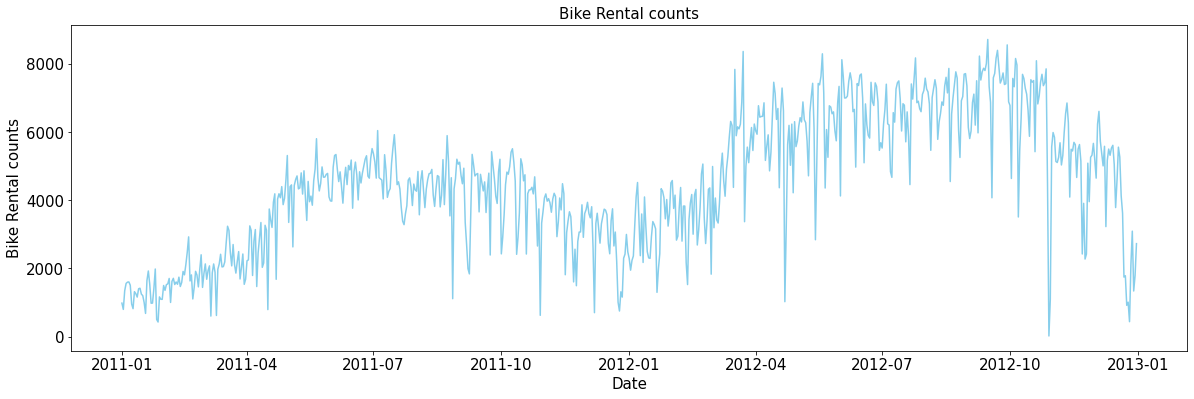

In [15]:
## set the figure dimensions
line_fig = plt.figure(figsize = (20, 6))
    
daily_Counts = bike_sharing_data.groupby(bike_sharing_data.dteday)['cnt'].agg(total_count=('cnt', 'sum')).reset_index()
    
## make a line plot
_  = plt.plot(daily_Counts["dteday"],daily_Counts["total_count"], color = "skyblue")

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Bike Rental counts", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Bike Rental counts", fontsize = 15)

## Set the x-label
_ = plt.xlabel("Date", fontsize = 15)

 The total count of bikes rented per day grows over a period of time. We can see the seasonality present in the data, for summer season the count of bikes rented are high as compared to other months.

# Data Preprocessing

Checking whether we have any missing values in our data.

In [16]:
#checking for missing values
bike_sharing_data.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
month_year    False
dtype: bool

We dont have any missing value in the dataset. 

In [17]:
#Dropping 'instant' column (record index: id's) since it represents the id's of the observation.
bike_sharing_data.drop(['instant'], axis=1, inplace=True)
bike_sharing_data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month_year
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011-01
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011-01
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011-01


Checking for multicollinearity (redundancy) in the data.

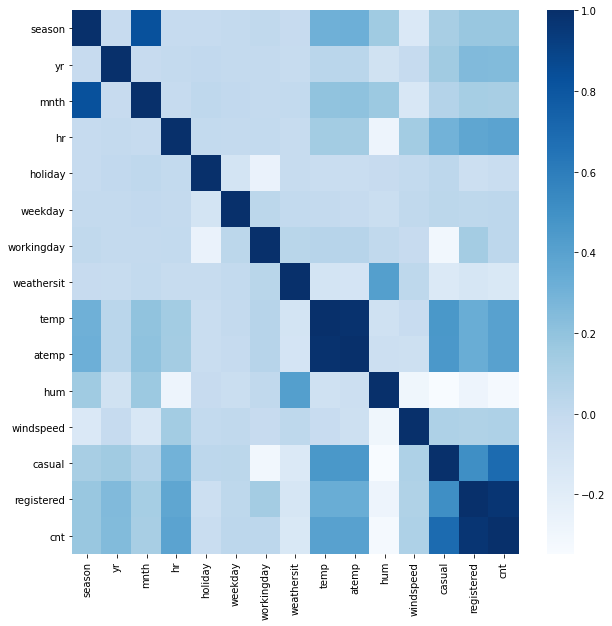

In [18]:
#Correlation between the numeric variables
correlation = bike_sharing_data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cmap="Blues")

Variables 'temp' and 'atemp' are strongly correlated. Also variables 'mnth' and 'season' are highly correlated. Dropping variables 'atemp' and 'season' since they will exhibit multicollinearity (redundancy) in the data. 

Also, when its not holiday and not weekend (weeday = 0, Sunday or 6, Saturday), then its a working day. Since working day is derived from other 2 variables, dropping variable 'workingday'. 

In [19]:
bike_sharing_data.drop(['atemp', 'season', 'workingday'], axis=1, inplace=True)
bike_sharing_data.head()

,dteday,yr,mnth,hr,holiday,weekday,weathersit,temp,hum,windspeed,casual,registered,cnt,month_year
0,2011-01-01,0,1,0,0,6,1,0.24,0.81,0.0,3,13,16,2011-01
1,2011-01-01,0,1,1,0,6,1,0.22,0.80,0.0,8,32,40,2011-01
2,2011-01-01,0,1,2,0,6,1,0.22,0.80,0.0,5,27,32,2011-01
3,2011-01-01,0,1,3,0,6,1,0.24,0.75,0.0,3,10,13,2011-01
4,2011-01-01,0,1,4,0,6,1,0.24,0.75,0.0,0,1,1,2011-01


Fetching day_of_month from the date 'dteday' variable

In [20]:
bike_sharing_data['day_of_month'] = pd.DatetimeIndex(bike_sharing_data['dteday']).day
bike_sharing_data.tail()

,dteday,yr,mnth,hr,holiday,weekday,weathersit,temp,hum,windspeed,casual,registered,cnt,month_year,day_of_month
17374,2012-12-31,1,12,19,0,1,2,0.26,0.60,0.1642,11,108,119,2012-12,31
17375,2012-12-31,1,12,20,0,1,2,0.26,0.60,0.1642,8,81,89,2012-12,31
17376,2012-12-31,1,12,21,0,1,1,0.26,0.60,0.1642,7,83,90,2012-12,31
17377,2012-12-31,1,12,22,0,1,1,0.26,0.56,0.1343,13,48,61,2012-12,31
17378,2012-12-31,1,12,23,0,1,1,0.26,0.65,0.1343,12,37,49,2012-12,31


Since we have 'day_of_month', 'mnth', and 'yr' as seperate variables, dropping remaining date variables 'dteday' and 'month_year'. Also, we have only 2 years of data, not including the 'yr' variable since it would not be significant in predicting the total count.

In [21]:
bike_sharing_data.drop(['dteday', 'month_year', 'yr'], axis=1, inplace=True)
bike_sharing_data.head()

,mnth,hr,holiday,weekday,weathersit,temp,hum,windspeed,casual,registered,cnt,day_of_month
0,1,0,0,6,1,0.24,0.81,0.0,3,13,16,1
1,1,1,0,6,1,0.22,0.80,0.0,8,32,40,1
2,1,2,0,6,1,0.22,0.80,0.0,5,27,32,1
3,1,3,0,6,1,0.24,0.75,0.0,3,10,13,1
4,1,4,0,6,1,0.24,0.75,0.0,0,1,1,1


Identifying Outliers

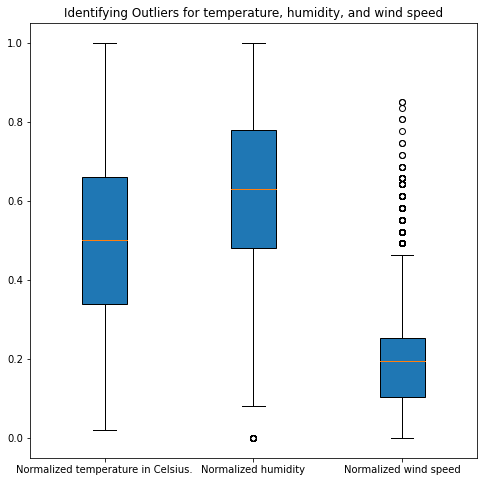

In [22]:
box_comp_hour = plt.figure(figsize = (8,8))

_ = plt.boxplot(
    [
            bike_sharing_data["temp"],
            bike_sharing_data['hum'],
            bike_sharing_data['windspeed']
    ],
    labels = [
        "Normalized temperature in Celsius.",
        "Normalized humidity",
        "Normalized wind speed"
    ], patch_artist=True)

_ = plt.title("Identifying Outliers for temperature, humidity, and wind speed")

Lets look at some of the outlier observations (absolute value of the Z-Score is greater than 3).

In [23]:
bike_sharing_data[(np.abs(stats.zscore(bike_sharing_data["hum"])) > 3) | (np.abs(stats.zscore(bike_sharing_data["windspeed"])) > 3)]

,mnth,hr,holiday,weekday,weathersit,temp,hum,windspeed,casual,registered,cnt,day_of_month
265,1,12,0,3,1,0.20,0.47,0.5821,3,52,55,12
467,1,12,0,5,1,0.22,0.27,0.5821,11,67,78,21
468,1,13,0,5,1,0.20,0.21,0.5821,8,65,73,21
870,2,17,0,2,1,0.22,0.32,0.5821,4,172,176,8
1007,2,15,0,1,1,0.56,0.21,0.6567,19,71,90,14
...,...,...,...,...,...,...,...,...,...,...,...,...
17153,12,12,0,6,1,0.30,0.36,0.6567,18,128,146,22
17156,12,15,0,6,1,0.32,0.33,0.5821,14,139,153,22
17341,12,10,0,0,1,0.26,0.41,0.5821,31,91,122,30
17343,12,12,0,0,1,0.28,0.36,0.5821,47,97,144,30


Outliers for variables 'hum', 'windspeed' are actual values which can not be neglected. Capping the data.

Replacing the outliers which are less than (Q1 - 1.5 * IQR) with the 5th percentile and 

Replace the outliers which are greater than (Q3 + 1.5 * IQR) with the 95th percentile of the data.

In [24]:
def handleOutliers(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    x[ x < x.quantile(0.05) ] = (Q1 - 1.5*IQR)
    x[ x > x.quantile(0.95) ] = (Q3 + 1.5*IQR)
    return x

In [25]:
bike_sharing_data['hum'] = handleOutliers(bike_sharing_data['hum'])
bike_sharing_data['windspeed'] = handleOutliers(bike_sharing_data['windspeed'])

Dropping duplicate observations if any.

In [26]:
bike_sharing_data = bike_sharing_data.drop_duplicates()

Since all the categorial variables ('mnth', 'hr', 'weekday', 'weathersit', 'day_of_month') are ordinal variables and variable 'holiday' is binary variable. So we do not need to create dummy variables for these variables.

We do not have to perform any standarization or normalization since variables 'temp', 'hum', and 'windspeed' are already normalized.

We will be predicting count of total rental bikes including both casual and registered ('cnt'). Removing variables 'casual' and 'registered'.

In [27]:
bike_sharing_data.drop(['casual', 'registered'], axis=1, inplace=True)
bike_sharing_data.head()

,mnth,hr,holiday,weekday,weathersit,temp,hum,windspeed,cnt,day_of_month
0,1,0,0,6,1,0.24,0.81,0.0,16,1
1,1,1,0,6,1,0.22,0.80,0.0,40,1
2,1,2,0,6,1,0.22,0.80,0.0,32,1
3,1,3,0,6,1,0.24,0.75,0.0,13,1
4,1,4,0,6,1,0.24,0.75,0.0,1,1


Feature importance

In [28]:
lr = LinearRegression()

#rank all features (continue the elimination until the last one)
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(bike_sharing_data.drop(['cnt'], axis=1), bike_sharing_data['cnt'])
 
print("Features sorted by their rank:")
sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), bike_sharing_data.drop(['cnt'], axis=1).columns))

Features sorted by their rank:


[(1, 'temp'),
 (2, 'hum'),
 (3, 'windspeed'),
 (4, 'holiday'),
 (5, 'hr'),
 (6, 'mnth'),
 (7, 'weathersit'),
 (8, 'weekday'),
 (9, 'day_of_month')]

Splitting the data into train(75%) and test(25%)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(bike_sharing_data.drop(['cnt'], axis=1), bike_sharing_data['cnt'], train_size=0.75, random_state=123)

# Fitting Models

### Linear Regression

In [30]:
# Create linear regression object
lm = LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)

# predict on a separate testing set
predictions = lm.predict(X_test)

# compute the SSE
SSE = sum((np.array(y_test) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print("Root Mean Square Error (RMSE) on test data: ")
print(RMSE)

Root Mean Square Error (RMSE) on test data: 
151.6494699751178


### k-nearest neighbors

Performing 5-fold cross-validation on data and tuning hyperparameter 'n_neighbors' using grid search.

In [31]:
KNN_regressor = KNeighborsRegressor()

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 123)

# hyperparameters
hyper_params = [{'n_neighbors': list(range(129, 137))}]

model_knn = GridSearchCV(estimator = KNN_regressor, 
                        param_grid = hyper_params, 
                        scoring= 'neg_root_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# fit the model
model_knn.fit(X_train, y_train)

# predict on a separate testing set
predictions = model_knn.predict(X_test)

# compute the SSE
SSE = ((np.array(y_test) - predictions)**2).sum()

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print("Root Mean Square Error (RMSE) on test data: ")
print(RMSE)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   37.2s finished


Root Mean Square Error (RMSE) on test data: 
119.84534328308183


### Decision Tree

Performing 5-fold cross-validation on data and tuning hyperparameter 'max_depth' using grid search.

In [32]:
DT_regressor = DecisionTreeRegressor(random_state = 123)

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 123)

# hyperparameters
hyper_params = [{'max_depth': list(range(3, 20))}]

model_dt = GridSearchCV(estimator = DT_regressor, 
                        param_grid = hyper_params, 
                        scoring= 'neg_root_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# fit the model
model_dt.fit(X_train, y_train)

# predict on a separate testing set
predictions = model_dt.predict(X_test)

# compute the SSE
SSE = ((np.array(y_test).transpose() - predictions)**2).sum()

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print("Root Mean Square Error (RMSE) on test data: ")
print(RMSE)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Root Mean Square Error (RMSE) on test data: 
82.15474556915505


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    4.3s finished


### Random Forest

Performing 5-fold cross-validation on data and tuning hyperparameter 'n_estimators' (number of trees) using grid search.

In [33]:
RF_regressor = RandomForestRegressor(random_state = 123)

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 123)

# hyperparameters
hyper_params = [{'n_estimators': [150, 200, 300]}]

model_rf = GridSearchCV(estimator = RF_regressor, 
                        param_grid = hyper_params, 
                        scoring= 'neg_root_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# fit the model
model_rf.fit(X_train, y_train)

# predict on a separate testing set
predictions = model_rf.predict(X_test)

# compute the SSE
SSE = ((np.array(y_test).transpose() - predictions)**2).sum()

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print("Root Mean Square Error (RMSE) on test data: ")
print(RMSE)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.4min finished


Root Mean Square Error (RMSE) on test data: 
66.31229301835563


# Performance Summary & Model Selection

In [34]:
#Function to calculate RMSE
def compute_RMSE(X_train, X_test, y_train, y_test, model):
    
    # Train RMSE
    train_RMSE = np.sqrt(((np.array(y_train).transpose() - model.predict(X_train))**2).sum()/len(y_train))
    
    # Test RMSE
    test_RMSE = np.sqrt(((np.array(y_test).transpose() - model.predict(X_test))**2).sum()/len(y_test))
    
    return [train_RMSE, test_RMSE]

In [35]:
# Model selection
models_list = [lm, model_knn, model_dt, model_rf]
index = ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest']
performance = pd.DataFrame(columns = ['Train_RMSE', 'Test_RMSE'])
for id, model in enumerate(models_list):
    performance.loc[index[id]] = compute_RMSE(X_train, X_test, y_train, y_test, model)
performance

,Train_RMSE,Test_RMSE
Linear Regression,147.162337,151.649470
KNN,116.066492,119.845343
Decision Tree,67.518410,82.154746
Random Forest,24.462691,66.312293


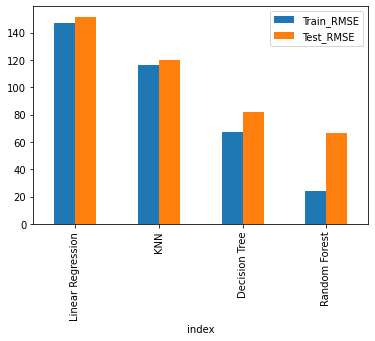

In [36]:
# RMSE score Graph
performance.reset_index().plot(x='index' ,y=['Train_RMSE', 'Test_RMSE'],kind='bar')

#### Model which gives lowest Root Mean Square Error (RMSE) value is preferred. From the above graph, Random Forest is giving better results on both train and test data. We will be using this random forest model (model_rf) for prediction of count of total rental bikes.

## Motivation 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. Also, the dataset was collected from Univeristy of Porto, where the city has to control over bike rental from tourists, it would be a good project for us to experience for predicting future data and machine learning.

## Aplication and Usage

- It will also enable to find mobility patterns in the city.
- Identifying the most of important events in the city by monitoring these data.
- This project could be expanded to Philadelphia's bike rental data analysis, since Philadelphia is well-known as bike-friendly city and many students living in University City use bike as transportation.
- Research purposes to discover important trends and relationships.

## Target Audience

- The possible target audience would be city employees who control over the bike rental business. 
- Bike rental companies would be another possible target audience, because, in order to run the business, it is better to have statistical data which can explain and predicts the rentals including why people rent or when they rent more.
- Government can use this data to find mobility patterns in the city which can be helpul in decision-making process.
- Bike manufacturers may find this analysis useful.


## Limitation

- The dataset is from 2011 and 2012, so it is a bit old and only 2 years of data.
- Various other features such as the duration of travel, departure and arrival position, distance, etc. which can be helpful to fetch valuable insights are not present in the dataset.
- The dataset is not realtime one.

## Improvements

To improve, we can collect more years of data from various sources along with additional features.